<a href="https://colab.research.google.com/github/geetika18/Tensorflow-Playground/blob/main/01_Neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow
Predicting a numerical variable based on some other combinations of variables. 

In [2]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating some data to view and fit

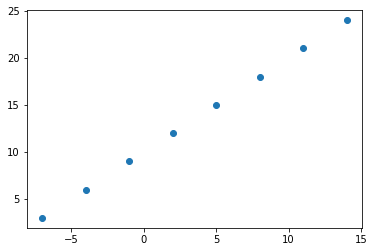

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create Features

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

In [4]:
y == X +10 

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

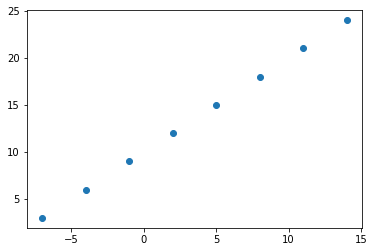

In [10]:
plt.scatter(X,y)

## steps in modelling with tensorflow
1. **creating a model** - define the input and putput layers as well as hidden layers of a deep learning model.
2. **compiling the model** - define a loss function(function which tells how wrong model is) and the optimiser( tells our model how to improve the patterns its learning) and evaluation metrics(what we can use to interpret the performance of our model).
3. **fitting a model** - letting the model try to find patterns between X & y(features and labels).


In [19]:
# set random seed
tf.random.set_seed(42)

# 1. creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile( loss = tf.keras.losses.mae, # mae = mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent
              metrics = ["mae"])

# 3. fit model
model.fit(tf.expand_dims(X, axis=-1),y, epochs = 5) # epochs - how many times the model will go through all of the training examples

Epoch 1/5
1/1 [==============================] - 0s 347ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [20]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [21]:
# Making a prediction using the model above
model.predict([17.0])

array([[12.716021]], dtype=float32)

In [26]:
# Improve the model - let's rebuild teh model

# 1. creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile( loss = tf.keras.losses.mae, # mae = mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent
              metrics = ["mae"])

# 3. fit model
model.fit(tf.expand_dims(X, axis=-1),y, epochs = 100) # epochs - how many times the model will go through all of the training examples

Epoch 1/100
1/1 [==============================] - 0s 308ms/step - loss: 9.8244 - mae: 9.8244
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 9.6919 - mae: 9.6919
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 9.5594 - mae: 9.5594
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 9.4269 - mae: 9.4269
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 9.2944 - mae: 9.2944
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.1619 - mae: 9.1619
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 9.0294 - mae: 9.0294
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.8969 - mae: 8.8969
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 8.7644 - mae: 8.7644
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 8.6319 - mae: 8.6319
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 8.4

In [28]:
model.predict([17.0]) 

array([[29.955261]], dtype=float32)

In [44]:
# improve model again 
model = tf.keras.Sequential([
      tf.keras.layers.Dense(100, activation = "relu"),
      tf.keras.layers.Dense(100, activation = "relu"),
      tf.keras.layers.Dense(100, activation = "relu"),
      tf.keras.layers.Dense(1)
  ])

model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["mae"])
  
model.fit(tf.expand_dims(X, axis=-1),y, epochs = 200)

Epoch 1/200
1/1 [==============================] - 1s 799ms/step - loss: 13.0194 - mae: 13.0194
Epoch 2/200
1/1 [==============================] - 0s 10ms/step - loss: 12.7441 - mae: 12.7441
Epoch 3/200
1/1 [==============================] - 0s 8ms/step - loss: 12.4703 - mae: 12.4703
Epoch 4/200
1/1 [==============================] - 0s 8ms/step - loss: 12.2000 - mae: 12.2000
Epoch 5/200
1/1 [==============================] - 0s 8ms/step - loss: 11.9219 - mae: 11.9219
Epoch 6/200
1/1 [==============================] - 0s 9ms/step - loss: 11.6391 - mae: 11.6391
Epoch 7/200
1/1 [==============================] - 0s 8ms/step - loss: 11.3398 - mae: 11.3398
Epoch 8/200
1/1 [==============================] - 0s 9ms/step - loss: 11.0894 - mae: 11.0894
Epoch 9/200
1/1 [==============================] - 0s 10ms/step - loss: 10.8641 - mae: 10.8641
Epoch 10/200
1/1 [==============================] - 0s 9ms/step - loss: 10.6322 - mae: 10.6322
Epoch 11/200
1/1 [==============================] - 0s 

In [45]:
model.predict([17.0])

array([[27.716743]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you will go through when building neural netwroks is: 
...
Build a model --> fit it --> evaluate it --> tweak the model --> fit it --> evaluate it --> tweak the model --> fit it --> evaluate it ...
...

## when it comes to evaluation: 
" Visualize, Visualize, Visualize"
* the data
* the model
* the training of a model
* the predictions of the model


In [46]:
# make a bigger data set
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [47]:
# Make labels for dataset
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

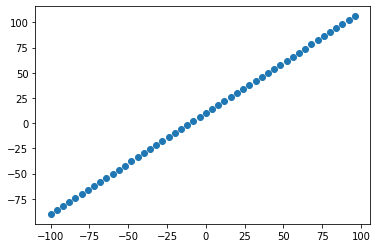

In [49]:
# visualise data
plt.scatter(X,y)

### The 3 sets...
* training set - the model learns from this data which is typically 70-80 percent of total data you have. 
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* test set - the model gets evaluated on this data to test what is had learned , this set is typically 10-15% of total data available. 

In [50]:
# check the length of samples
len(X)

50

In [52]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]
len(X_train), len(X_test
                  )

(40, 10)

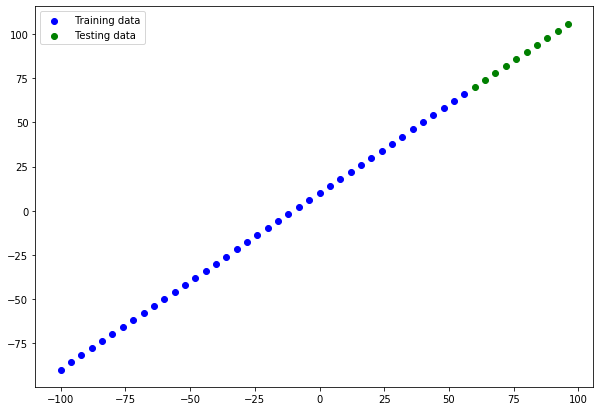

In [59]:
### Visualizing the data
plt.figure(figsize= (10,7))
# plot training data in blue
plt.scatter(X_train, y_train, c ="b", label = " Training data")
# plot the test data in green
plt.scatter(X_test, y_test, c = "g", label = " Testing data")
# Show legend
plt.legend();